## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Importing the Raw Data 

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [3]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data1 = raw_data.dropna()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


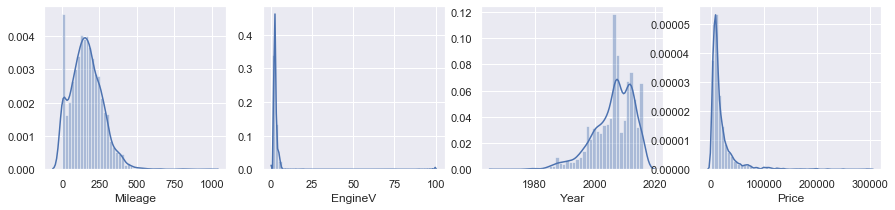

In [5]:
fig , ax = plt.subplots(1,4 ,  figsize =(15,3))
sns.distplot(data1['Mileage'], ax = ax[0])
sns.distplot(data1['EngineV'], ax = ax[1])
sns.distplot(data1['Year'], ax = ax[2])
sns.distplot(data1['Price'], ax = ax[3])
fig.show()

## Removing outliers using quantiles

In [6]:
q_mil = data1['Mileage'].quantile(0.99)
q_year = data1['Year'].quantile(0.01)
q_Eng = 6.5

data_cleaned = data1.loc[(data1['Mileage']<q_mil) & (data1['Year']>q_year) & (data1['EngineV']<6.5),data1.columns != 'Model']

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


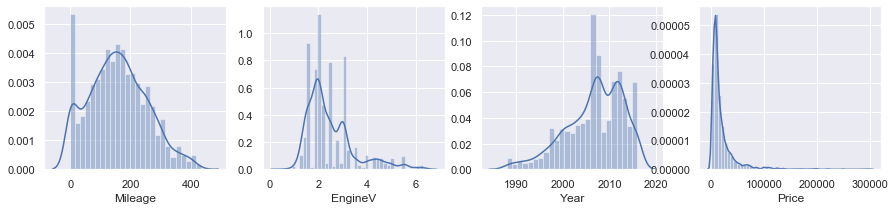

In [7]:
fig , ax = plt.subplots(1,4 ,  figsize =(15,3))
sns.distplot(data_cleaned['Mileage'], ax = ax[0])
sns.distplot(data_cleaned['EngineV'], ax = ax[1])
sns.distplot(data_cleaned['Year'], ax = ax[2])
sns.distplot(data_cleaned['Price'], ax = ax[3])
fig.show()

## Analysing the relationship between the price and independent variables

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


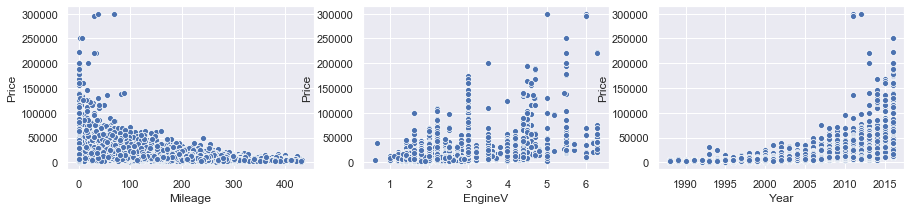

In [8]:
fig , ax = plt.subplots(1,3, figsize =(15,3))
sns.scatterplot(data_cleaned['Mileage'], data_cleaned['Price'], ax= ax[0])
sns.scatterplot(data_cleaned['EngineV'], data_cleaned['Price'], ax= ax[1])
sns.scatterplot(data_cleaned['Year'], data_cleaned['Price'], ax= ax[2])

fig.show()

### Log transformation to reduce the exponentiality of the price 

In [9]:
price_log = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = price_log


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


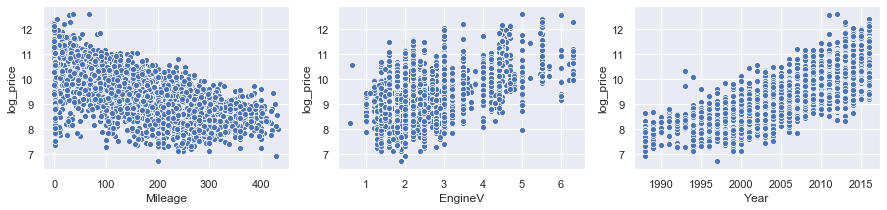

In [10]:
fig , ax = plt.subplots(1,3, figsize =(15,3))
sns.scatterplot(data_cleaned['Mileage'], data_cleaned['log_price'], ax= ax[0])
sns.scatterplot(data_cleaned['EngineV'], data_cleaned['log_price'], ax= ax[1])
sns.scatterplot(data_cleaned['Year'], data_cleaned['log_price'], ax= ax[2])

fig.show()

### Check for Multicolinearity

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
variables =data_cleaned[['Mileage','EngineV', 'Year']]
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i ) for i in range(variables.shape[1])]
vif


,Features,VIF
0,Mileage,3.703266
1,EngineV,7.400348
2,Year,10.323287


In [12]:
data_cleaned = data_cleaned.drop(['Year'], axis =1)
data_cleaned.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'log_price'],
      dtype='object')

### Create Dummy Variables

In [13]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first = True)
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [14]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [15]:
cols =['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [16]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Models

In [17]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

In [18]:
reg  = LinearRegression()
reg.fit(inputs,targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

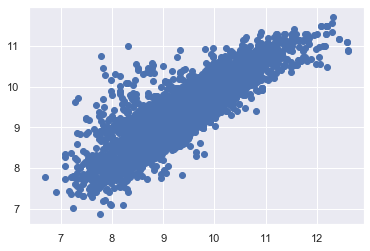

In [19]:
target_hat = reg.predict(inputs)
plt.scatter(targets,target_hat)

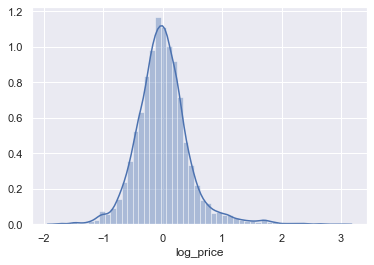

In [20]:
sns.distplot(target_hat-targets)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
inputs_scaled = scaler.transform(inputs)

### train and test split

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2 , random_state =365)

### Regression Models


In [24]:
reg_train = LinearRegression()
reg_train.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

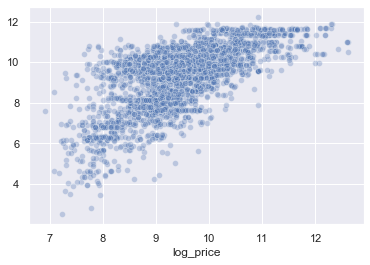

In [25]:
y_train_hat = reg.predict(x_train)
sns.scatterplot(y_train,y_train_hat , alpha= 0.3)

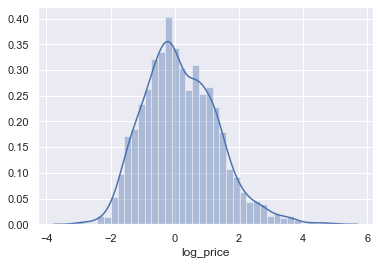

In [26]:
sns.distplot(y_train-y_train_hat)

## Summary table for regression Model

In [27]:
cols =['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [28]:
summary_table = pd.DataFrame()
summary_table["Features"] = cols
summary_table['Weights']= reg_train.coef_

In [29]:
summary_table

,Features,Weights
0,Mileage,-0.477134
1,EngineV,0.252793
2,Brand_BMW,0.026598
3,Brand_Mercedes-Benz,0.036006
4,Brand_Mitsubishi,-0.127270
5,Brand_Renault,-0.166703
6,Brand_Toyota,-0.048485
7,Brand_Volkswagen,-0.071804
8,Body_hatch,-0.140250
9,Body_other,-0.096221


In [30]:
inputs.columns

Index(['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [31]:
summary_table

,Features,Weights
0,Mileage,-0.477134
1,EngineV,0.252793
2,Brand_BMW,0.026598
3,Brand_Mercedes-Benz,0.036006
4,Brand_Mitsubishi,-0.127270
5,Brand_Renault,-0.166703
6,Brand_Toyota,-0.048485
7,Brand_Volkswagen,-0.071804
8,Body_hatch,-0.140250
9,Body_other,-0.096221


In [32]:
reg_train.score(x_train,y_train)

0.7520453281718504

## Testing

In [33]:
y_test_hat = reg_train.predict(x_test)

TestResults = pd.DataFrame()
TestResults["Orginal_price"]= np.exp(y_test.reset_index(drop = True))
TestResults["Prediction"] = np.exp(y_test_hat)

In [34]:
TestResults.head()

,Orginal_price,Prediction
0,1800.0,2497.123713
1,10800.0,7456.534893
2,14900.0,13496.814274
3,11000.0,7573.105796
4,16999.0,16502.817902


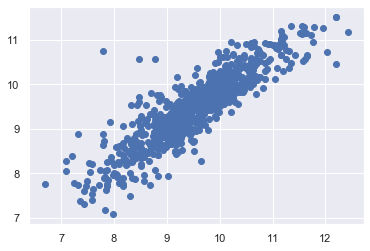

In [35]:
plt.scatter(y_test,y_test_hat)

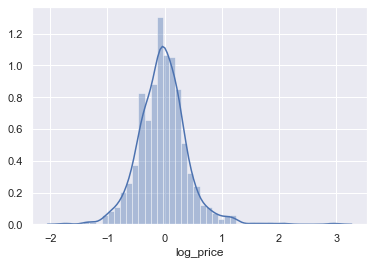

In [36]:
sns.distplot(y_test_hat - y_test)

In [37]:
TestResults["Residual"] = TestResults["Orginal_price"] - TestResults["Prediction"]

TestResults["Difference%"] =np.absolute(TestResults["Residual"]/TestResults["Orginal_price"]*100)


In [38]:
TestResults.describe()

,Orginal_price,Prediction,Residual,Difference%
count,782.000000,782.000000,782.000000,782.000000
mean,20717.216803,17668.626792,3048.590012,35.024687
std,25654.851301,15260.172350,15487.661137,79.023527
min,800.000000,1195.372625,-44009.355675,0.044431
25%,7500.000000,7642.370756,-2106.719386,10.244297
50%,12500.000000,12647.391012,453.938710,23.326711
75%,23324.750000,22630.721407,3734.118831,38.876238
max,249999.000000,99473.692128,179168.433265,1833.723153


In [39]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
TestResults.sort_values(by=['Difference%'])

,Orginal_price,Prediction,Residual,Difference%
54,32400.00,32385.60,14.40,0.04
662,46500.00,46574.25,-74.25,0.16
384,17639.47,17600.14,39.33,0.22
526,55000.00,54866.55,133.45,0.24
240,8300.00,8278.72,21.28,0.26
497,8350.00,8323.24,26.76,0.32
580,12900.00,12944.41,-44.41,0.34
270,18999.00,18930.10,68.90,0.36
607,32500.00,32359.77,140.23,0.43
565,12900.00,12839.50,60.50,0.47


##  Feature Selection to remove the unwanted Regressors to avoid overfitting

In [40]:
from sklearn.feature_selection import f_regression

f_and_p =f_regression(x_train, y_train)

In [41]:
feature_Summary = pd.DataFrame()
feature_Summary["Features"]= inputs.columns
feature_Summary["F-Satastic"]= f_and_p[0]
feature_Summary["P-values"]= f_and_p[1].round(3)
feature_Summary

,Features,F-Satastic,P-values
0,Mileage,1941.34,0.00
1,EngineV,812.32,0.00
2,Brand_BMW,16.79,0.00
3,Brand_Mercedes-Benz,81.33,0.00
4,Brand_Mitsubishi,23.38,0.00
5,Brand_Renault,140.43,0.00
6,Brand_Toyota,67.81,0.00
7,Brand_Volkswagen,38.82,0.00
8,Body_hatch,65.71,0.00
9,Body_other,7.61,0.01


#### since, all the p-values are less than 0.05, we have to look at F-stastic and , for a play to look at the differnce 

we are gonna remove all the Regressors expect Mileage, Engine , Registration_yes

In [42]:
inputs.head()
new_inputs = inputs[["Mileage","EngineV","Registration_yes"]]
scaler_new = StandardScaler()
scaler_new.fit(new_inputs)
new_inputs_scaled = scaler_new.transform(new_inputs)       

In [43]:
## removing outliers by Zscore
scaler_new = StandardScaler()
scaler_new.fit(new_inputs)
new_inputs_scaled = scaler_new.transform(new_inputs)       

In [44]:
x1_train, x1_test = train_test_split(new_inputs_scaled , test_size = 0.2, random_state=365)

In [45]:
new_reg = LinearRegression()
new_reg.fit(x1_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
r2=new_reg.score(x1_train,y_train)


In [47]:
n = x1_train.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = x1_train.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.654666093032233

In [48]:
new_reg.coef_

array([-0.48683218,  0.39493394,  0.26806546])

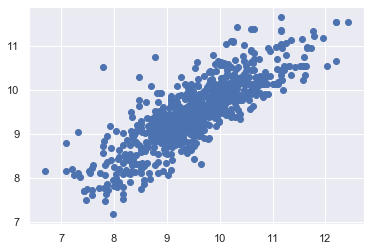

In [49]:
y_test_hat_new = new_reg.predict(x1_test)

plt.scatter(y_test,y_test_hat_new)

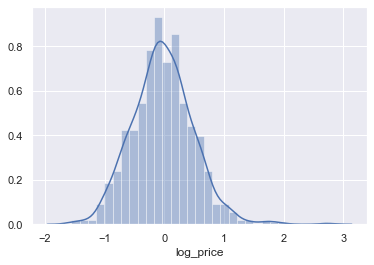

In [50]:
sns.distplot(y_test_hat_new-y_test)